<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

---

# 📝 Assignment

# 1. 데이터셋 불러오기 

- 서울시 기간별 시간평균 대기환경 정보 데이터셋을 사용합니다.

  https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do

- `2020년 3월`의 송파구 데이터만 사용합니다. 

- 데이터셋을 불러와 변수 `df`에 저장합니다.

- `측정일시`, `측정소명`, `오존(ppm)` column만 사용합니다.

- index를 초기화합니다.

In [1]:
# 이 곳에 답안을 작성하시기 바랍니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving 서울시_기간별_시간평균_대기환경_정보_2020.03.csv to 서울시_기간별_시간평균_대기환경_정보_2020.03 (1).csv


In [2]:
df = pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2020.03.csv',encoding='cp949')
df

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
18595,202003010000,103,서남권,111231,영등포구,33,29,23,0.002,0.050,0.8,0.003
18596,202003010000,104,동남권,111261,강남구,26,25,19,0.008,0.046,0.7,0.002
18597,202003010000,104,동남권,111262,서초구,46,35,27,0.007,0.054,0.5,0.003
18598,202003010000,104,동남권,111274,강동구,36,31,22,0.002,0.043,0.6,0.002


In [53]:
df = df[df['측정소명'] =='송파구'] ##측정일시, 측정소명, 오존(ppm) column만 사용합니다.
df = df[['측정일시','측정소명','오존(ppm)']].reset_index(drop=True)
df


,측정일시,측정소명,오존(ppm)
0,202003312300,송파구,0.020
1,202003312200,송파구,0.021
2,202003312100,송파구,0.025
3,202003312000,송파구,0.032
4,202003311900,송파구,0.034
...,...,...,...
739,202003010400,송파구,0.002
740,202003010300,송파구,0.002
741,202003010200,송파구,0.002
742,202003010100,송파구,0.002


# 2. 큰 수의 법칙

표본 크기가 커질수록 표본평균이 모평균에 가까워지는 것을 확인합니다. 

- `df['오존(ppm)']`을 모집단으로 하였을 때, 모평균을 `pop_mean`에 저장합니다. 

- 모집단에서 10개의 데이터를 추출하여 평균을 `sample_10_mean`에 저장합니다.

- 모집단에서 200개의 데이터를 추출하여 평균을 `sample_200_mean`에 저장합니다. 

- `.sample()` 함수를 활용합니다. 
  - `random_state=42`로 설정합니다. 

- 다음과 같이 시각화 합니다.  

  <img src = 'https://i.imgur.com/jlhzucj.png'>

In [63]:
# 이 곳에 답안을 작성하시기 바랍니다.
import random
np.random.seed(0)
pop = df['오존(ppm)']
pop_mean = pop.mean()
sample_10 = pop.sample(n=10,random_state = 42)
sample_200 = pop.sample(n=200, random_state = 42)
sample_10_mean = sample_10.mean()
sample_200_mean = sample_200.mean()

In [64]:
sample_200_mean

0.02291999999999995

In [65]:
pop

0      0.020
1      0.021
2      0.025
3      0.032
4      0.034
       ...  
739    0.002
740    0.002
741    0.002
742    0.002
743    0.002
Name: 오존(ppm), Length: 744, dtype: float64

(0.0, 135.0)

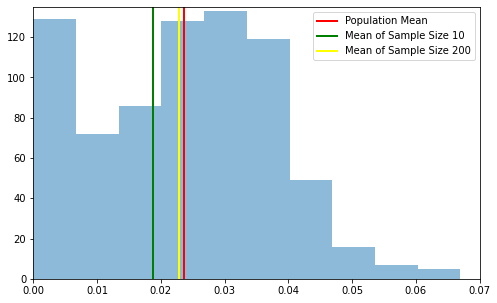

In [66]:
plt.figure(figsize=(8,5))
plt.hist(pop , alpha=.5)
plt.axvline(pop_mean,c='red',lw=2,label='Population Mean')
plt.axvline(sample_10_mean,c='green',lw=2,label='Mean of Sample Size 10')
plt.axvline(sample_200_mean,c='yellow',lw=2,label='Mean of Sample Size 200')
plt.legend();
plt.xlim(0,0.07)
plt.ylim(0,135)

# 3. 중심극한정리 

표본 평균들의 분포가 정규분포를 이루는지 확인합니다.  

- numpy의 `randam.choice()` 함수를 활용하여 `df['오존(ppm)']`에서 20개의 데이터를 추출합니다.

- 20개의 데이터의 평균을 계산하여 리스트 `s1`에 저장합니다. 

- 위 과정을 `for loop`을 이용하여 10,000번 반복합니다. 즉, `s1`에는 10,000번 추출된 20개의 데이터의 평균값이 저장됩니다. 

- 평균값들의 분포를 `seaborn.kdeplot()`을 활용하여 시각화 하세요.

  https://seaborn.pydata.org/generated/seaborn.kdeplot.html

In [25]:
# 이 곳에 답안을 작성하시기 바랍니다.
s1 = []
for i in range(10000):
   sample=np.random.choice(pop,20)
   s1.append(sample.mean())
s1

[0.03135,
 0.022400000000000003,
 0.025200000000000007,
 0.02285,
 0.0194,
 0.022199999999999998,
 0.024100000000000003,
 0.024900000000000002,
 0.024850000000000004,
 0.0206,
 0.025450000000000007,
 0.027950000000000003,
 0.022,
 0.028900000000000002,
 0.023150000000000004,
 0.02425,
 0.022650000000000003,
 0.022399999999999996,
 0.022600000000000002,
 0.0267,
 0.030000000000000006,
 0.02325,
 0.021650000000000003,
 0.023700000000000002,
 0.022800000000000004,
 0.0246,
 0.022600000000000002,
 0.025700000000000008,
 0.020799999999999996,
 0.019100000000000006,
 0.023150000000000004,
 0.027700000000000002,
 0.027350000000000003,
 0.022900000000000004,
 0.02345,
 0.017200000000000003,
 0.021900000000000003,
 0.026100000000000005,
 0.02115,
 0.027250000000000003,
 0.020450000000000003,
 0.028750000000000005,
 0.025050000000000006,
 0.023000000000000003,
 0.021800000000000003,
 0.02195,
 0.02585,
 0.024050000000000002,
 0.02155,
 0.02605,
 0.0263,
 0.025850000000000005,
 0.02075,
 0.022400

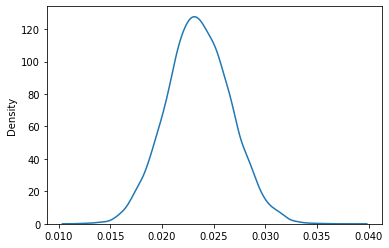

In [30]:
import seaborn as sns
sns.kdeplot(data=s1)

# 4. 신뢰구간 

2번에서 빌드한 표본 평균 분포에 대하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 나타냅니다. 

- 평균은 초록 세로선으로, 신뢰구간 95% 구간은 빨간 세로선으로 나타내세요. 

In [61]:
# 평균은 초록 세로선으로, 신뢰구간 95% 구간은 빨간 세로선으로 나타내세요.
lower, upper = np.percentile(pop, 2.5), np.percentile(pop, 97.5)
lower, upper

(0.002, 0.050424999999999956)

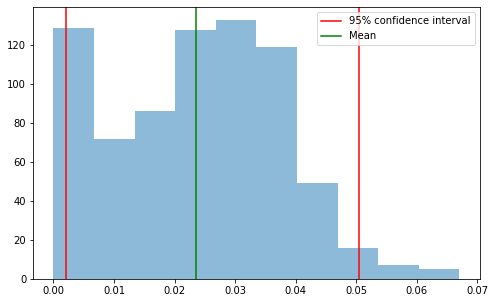

In [70]:
sample_10 = np.array(sample_10)
sample_200 = np.array(sample_200)
pop = np.array(pop)

plt.figure(figsize=(8,5))          ### 모집단 
plt.hist(pop, alpha =0.5)
plt.axvline(lower, c='red', label = '95% confidence interval')
plt.axvline(upper, c='red')
plt.axvline(pop_mean, c='green', label='Mean')
plt.legend();   

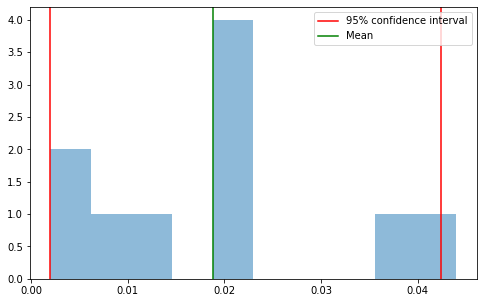

In [71]:
lower, upper = np.percentile(sample_10, 2.5), np.percentile(sample_10, 97.5)

plt.figure(figsize=(8,5))          ### 표본10개 
plt.hist(sample_10, alpha =0.5)
plt.axvline(lower, c='red', label = '95% confidence interval')
plt.axvline(upper, c='red')
plt.axvline(sample_10_mean, c='green', label='Mean')
plt.legend();   

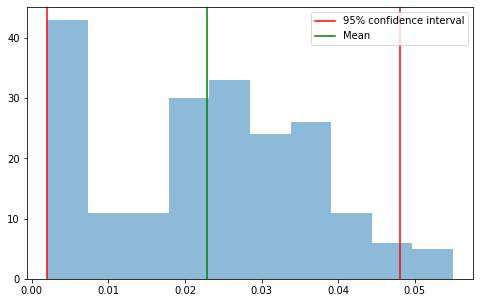

In [72]:
lower, upper = np.percentile(sample_200, 2.5), np.percentile(sample_200, 97.5)

plt.figure(figsize=(8,5))          ### 표본200개 
plt.hist(sample_200, alpha =0.5)
plt.axvline(lower, c='red', label = '95% confidence interval')
plt.axvline(upper, c='red')
plt.axvline(sample_200_mean, c='green', label='Mean')
plt.legend();   

# 🔥 도전 과제

**2번에서 구한 두 표본 `sample_10`, `sample_200`을 계속 사용합니다.**

- 한 표본의 신뢰구간을 수학적으로 다음 식과 같이 나타낼 수 있습니다. 

  $\bar{x} ± t \cdot {s\over \sqrt{n}}$

  - $\bar{x}$ : 표본의 평균
  - $t$ : t-value
  - $s$ : 표본의 표준편차
  - $n$ : 데이터 수 

- 위의 신뢰구간 식과 `plt.bar()`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요. 

  <img src = 'https://i.imgur.com/E0NkLdl.png'>

- 위의 시각화로부터 도출할 수 있는 insight를 설명해 보세요. 